# **Mapping Storm event: NOAA Dataset Visualization**

# **Imports**

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
alt.data_transformers.disable_max_rows()
import ipywidgets as widgets
from IPython.display import display, HTML

# Downloading dataset
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import gzip
import shutil

# **Dataset**

- The Storm Events Database is an official publication of the National Oceanic and Atmospheric Administration (NOAA).
- Link to the dataset: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/ 
- Documents occurrences of storms and significant weather phenomena with sufficient intensity to cause:
     - Loss of life
     - Injuries
     - Significant property damage
     - Disruption to commerce

- This dataset is divided into many gzipped csv files, one for each year (1950-2023)




In [ ]:
def download_and_combine_csvs(urls):
    data_frames = []

    # Create a temporary directory
    temp_dir = 'temp'
    os.makedirs(temp_dir, exist_ok=True)

    for url in urls:
        # Download and decompress the file
        response = requests.get(url)
        with open(os.path.join(temp_dir, 'temp.gz'), 'wb') as temp_file:
            temp_file.write(response.content)

        # Decompress the file
        with gzip.open(os.path.join(temp_dir, 'temp.gz'), 'rb') as gz_file:
            with open(os.path.join(temp_dir, 'temp.csv'), 'wb') as csv_file:
                shutil.copyfileobj(gz_file, csv_file)

        # Read the CSV into a DataFrame
        df = pd.read_csv(os.path.join(temp_dir, 'temp.csv'))

        # Append the DataFrame to the list
        data_frames.append(df)

    # Concatenate all DataFrames into a single DataFrame
    StormEvents_df = pd.concat(data_frames, ignore_index=True)

    # Clean up temporary files
    shutil.rmtree(temp_dir)

    return StormEvents_df

def get_urls_with_keyword(url, keyword):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all the 'a' (anchor) tags
        anchor_tags = soup.find_all('a')

        # Extract URLs from the 'href' attribute of anchor tags
        base_url = url
        urls = [urljoin(base_url, a.get('href')) for a in anchor_tags if a.get('href') is not None]

        # Filter URLs containing the keyword
        filtered_urls = [u for u in urls if keyword in u]

        return filtered_urls
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None

url_to_scrape = 'https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
keyword_to_filter = 'details'

result_urls = get_urls_with_keyword(url_to_scrape, keyword_to_filter)

if result_urls:
    StormEvents_df = download_and_combine_csvs(result_urls)

StormEvents_df['STATE'] = StormEvents_df['STATE'].str.upper()

### Dataset Checks

In [3]:
StormEvents_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [4]:
StormEvents_df.dtypes

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID            float64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [5]:
StormEvents_df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,1.862359e+06,1.862359e+06,1.862359e+06,1.862359e+06,1.862359e+06,1.862359e+06,1.630113e+06,1.862359e+06,1.862358e+06,1.862359e+06,...,482.000000,271117.000000,271117.000000,3086.000000,1.028827e+06,1.028552e+06,1.145012e+06,1.145004e+06,967523.000000,967516.000000
mean,2.006886e+05,1.496795e+01,1.312321e+03,2.006886e+05,1.639381e+01,1.483384e+03,5.530682e+05,3.199151e+06,3.191284e+01,2.006826e+03,...,1.564315,0.936385,35.938046,103.128321,2.373568e+00,2.323473e+00,3.782260e+01,-9.078435e+01,37.865373,-90.560583
std,1.243834e+03,9.090016e+00,6.699457e+02,1.243833e+03,9.102386e+00,6.053735e+02,1.512032e+06,3.899212e+06,1.760480e+01,1.243835e+01,...,1.044246,8.032438,135.879240,82.929134,5.860562e+00,4.626952e+00,4.950812e+00,1.042043e+01,4.979793,10.675349
min,1.950010e+05,1.000000e+00,0.000000e+00,1.950010e+05,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.950000e+03,...,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.440000e+01,-1.714000e+02,-14.456000,-171.400000
25%,2.000110e+05,7.000000e+00,8.450000e+02,2.000110e+05,9.000000e+00,1.151000e+03,7.143900e+04,4.922915e+05,1.900000e+01,2.000000e+03,...,1.000000,0.000000,0.000000,47.000000,0.000000e+00,0.000000e+00,3.440000e+01,-9.749000e+01,34.545100,-97.380000
50%,2.009040e+05,1.500000e+01,1.506000e+03,2.009040e+05,1.600000e+01,1.613000e+03,1.432270e+05,9.828360e+05,3.100000e+01,2.009000e+03,...,1.000000,0.000000,0.000000,91.000000,1.000000e+00,1.000000e+00,3.804000e+01,-9.097000e+01,38.100000,-90.434800
75%,2.016070e+05,2.300000e+01,1.815000e+03,2.016070e+05,2.400000e+01,1.910000e+03,1.136917e+06,5.489840e+06,4.600000e+01,2.016000e+03,...,2.000000,0.100000,20.000000,139.000000,3.000000e+00,3.000000e+00,4.133000e+01,-8.303000e+01,41.350000,-82.608475
max,2.023090e+05,3.100000e+01,2.359000e+03,2.023090e+05,3.100000e+01,2.359000e+03,9.900000e+08,9.900000e+08,9.900000e+01,2.023000e+03,...,5.000000,2315.000000,4576.000000,820.000000,3.749000e+03,9.250000e+02,9.710000e+01,1.713661e+02,97.100000,171.366100


# **Exploring Storm Reports from 1950-2023: Time, Type, Distribution**


### Data Cleaning/Engineering

In [6]:
tornado = StormEvents_df[StormEvents_df['EVENT_TYPE'] == 'Tornado']
hail = StormEvents_df[StormEvents_df['EVENT_TYPE'] == 'Hail']
wind = StormEvents_df[((StormEvents_df['EVENT_TYPE'] == 'Thunderstorm Wind') | (StormEvents_df['EVENT_TYPE'] == 'Strong Wind')) | (StormEvents_df['EVENT_TYPE'] == 'High Wind')]
violent_tornadoes = StormEvents_df[(StormEvents_df['EVENT_TYPE'] == 'Tornado') & ((StormEvents_df['TOR_F_SCALE'] == 'EF4') | (StormEvents_df['TOR_F_SCALE'] == 'F4') | (StormEvents_df['TOR_F_SCALE'] == 'EF5') | (StormEvents_df['TOR_F_SCALE'] == 'F5'))]
event_types = StormEvents_df['EVENT_TYPE'].value_counts().head(15)
main_threats = StormEvents_df[(StormEvents_df['EVENT_TYPE'] == 'Tornado') | (StormEvents_df['EVENT_TYPE'] == 'Hail') | ((StormEvents_df['EVENT_TYPE'] == 'Thunderstorm Wind') | (StormEvents_df['EVENT_TYPE'] == 'Strong Wind')) | (StormEvents_df['EVENT_TYPE'] == 'High Wind')]

In [7]:
def map_tornado_rating(rating):
    if pd.isna(rating):
        return 'Unknown'
    elif rating.startswith('FU') or rating.startswith('EFU'):
        return 'FU/EFU'
    elif rating.startswith('F0') or rating.startswith('EF0'):
        return 'F0/EF0'
    elif rating.startswith('F1') or rating.startswith('EF1'):
        return 'F1/EF1'
    elif rating.startswith('F2') or rating.startswith('EF2'):
        return 'F2/EF2'
    elif rating.startswith('F3') or rating.startswith('EF3'):
        return 'F3/EF3'
    elif rating.startswith('F4') or rating.startswith('EF4'):
        return 'F4/EF4'
    elif rating.startswith('F5') or rating.startswith('EF5'):
        return 'F5/EF5'
    else:
        return 'Unknown'

# tornado['BINNED'] = tornado['TOR_F_SCALE'].apply(map_tornado_rating)
# tornado.loc[:, 'BINNED'] = tornado['TOR_F_SCALE'].apply(map_tornado_rating)
tornado = tornado.copy()
tornado['BINNED'] = tornado['TOR_F_SCALE'].apply(map_tornado_rating)



### Visualizations

In this segment there are 7 visualizations:
- The most reported types of storm reports
- The distribution o
- The distribution of hail, wind, and tornado reports by state
- The distribution of tornadoes by intensity
- The distribution of violent tornadoes by state

All visualizations in this section were made using `matplotlib`.

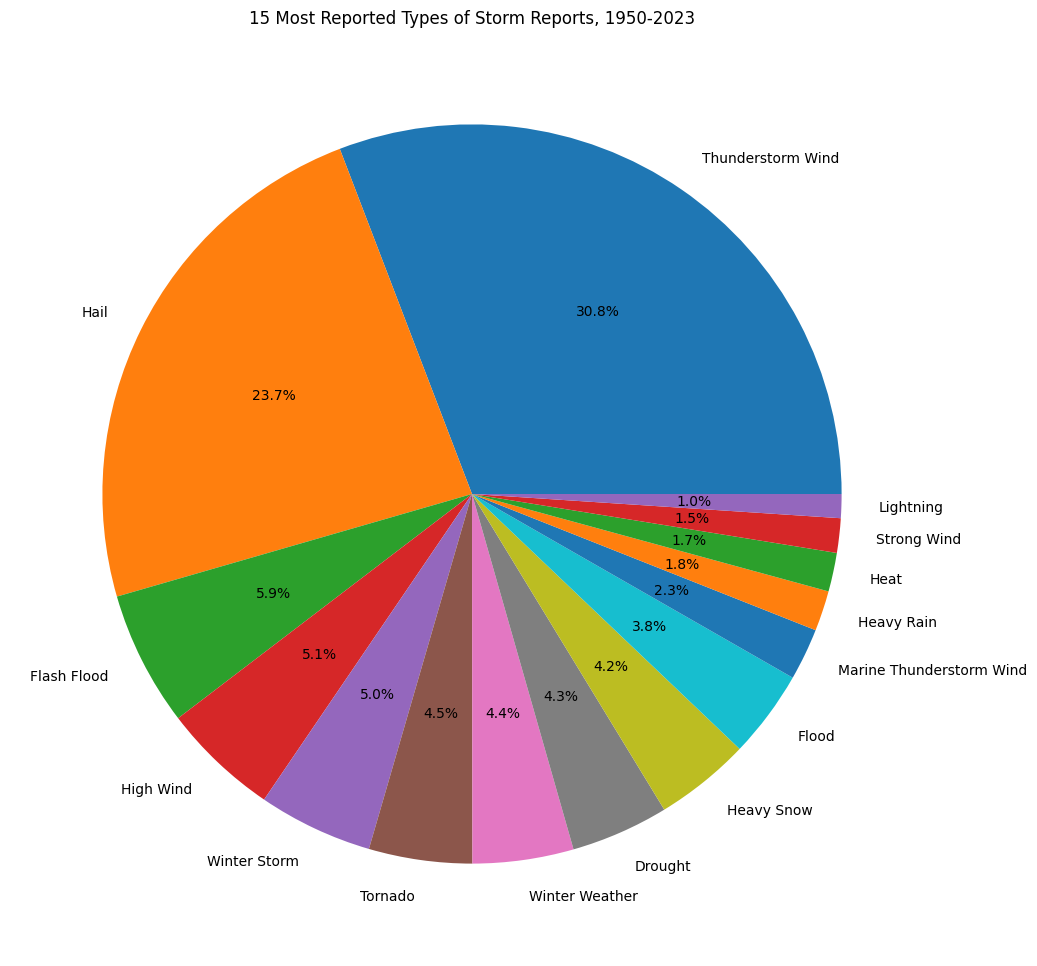

In [8]:
plt.figure(figsize=(12, 12))
plt.pie(event_types, labels=event_types.index, autopct='%1.1f%%')
plt.title('15 Most Reported Types of Storm Reports, 1950-2023')
plt.show()

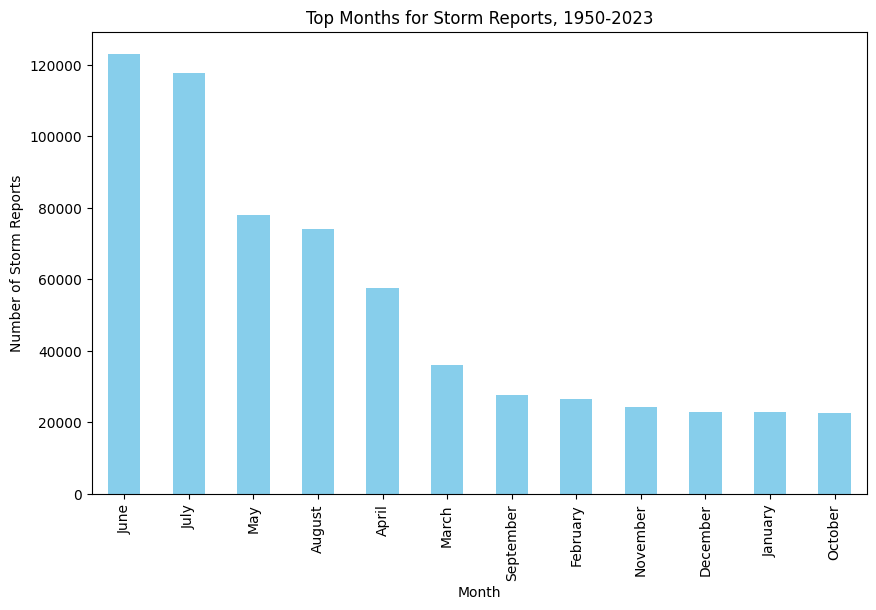

In [9]:
plt.figure(figsize=(10, 6))
wind['MONTH_NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Top Months for Storm Reports, 1950-2023")
plt.xlabel("Month")
plt.ylabel("Number of Storm Reports")
plt.show()

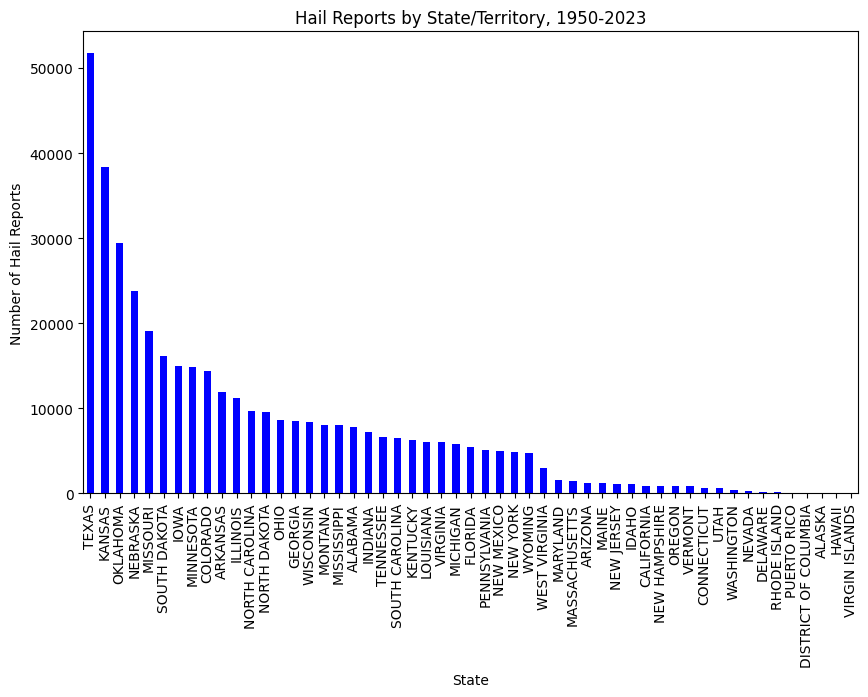

In [10]:
plt.figure(figsize=(10, 6))
hail['STATE'].value_counts().plot(kind='bar', color='blue')
plt.title("Hail Reports by State/Territory, 1950-2023")
plt.xlabel("State")
plt.ylabel("Number of Hail Reports")
plt.show()

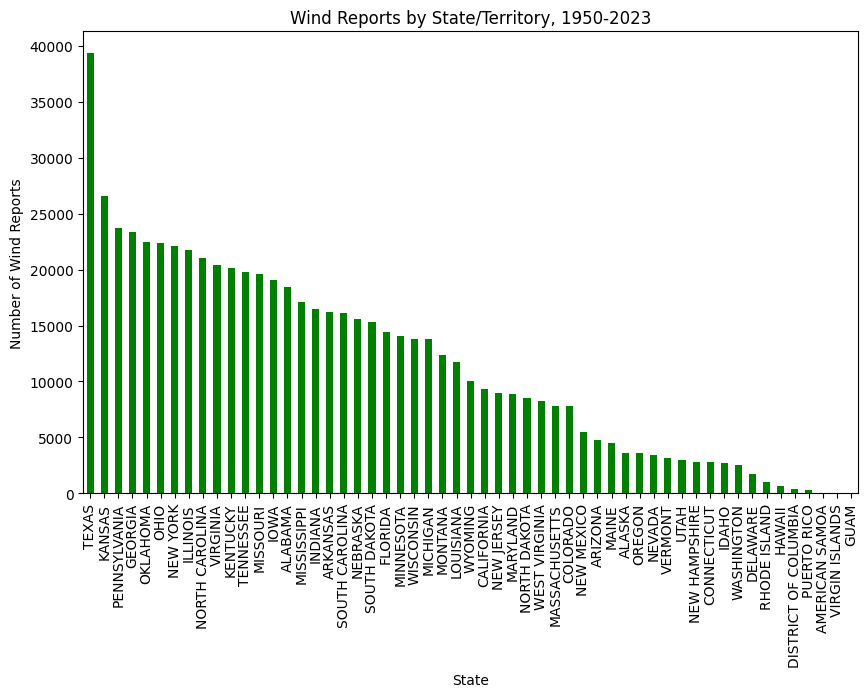

In [11]:
plt.figure(figsize=(10, 6))
wind['STATE'].value_counts().plot(kind='bar', color='green')
plt.title("Wind Reports by State/Territory, 1950-2023")
plt.xlabel("State")
plt.ylabel("Number of Wind Reports")
plt.show()

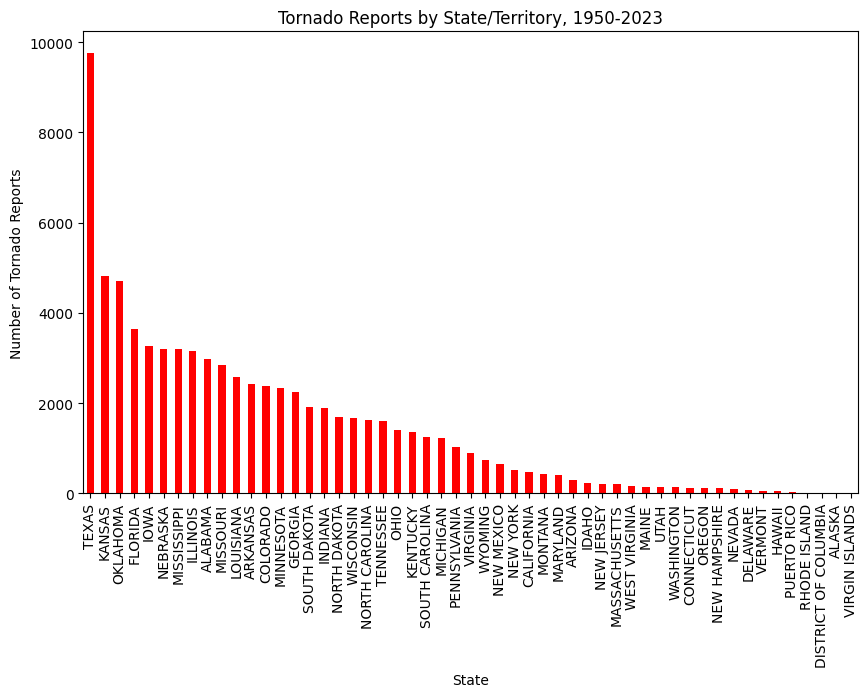

In [12]:
plt.figure(figsize=(10, 6))
tornado['STATE'].value_counts().plot(kind='bar', color='red')
plt.title("Tornado Reports by State/Territory, 1950-2023")
plt.xlabel("State")
plt.ylabel("Number of Tornado Reports")
plt.show()

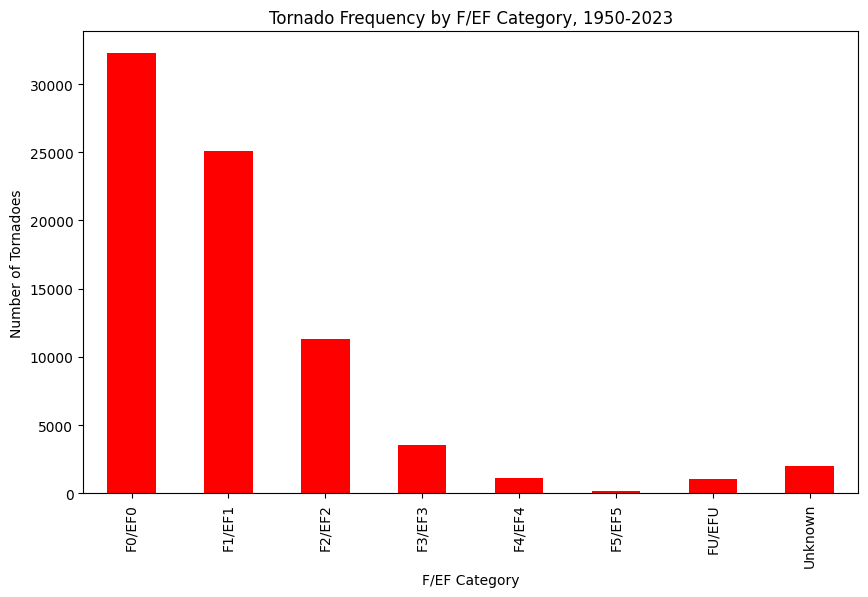

In [13]:
plt.figure(figsize=(10, 6))
tornado['BINNED'].value_counts().sort_index().plot(kind='bar', color='red')
plt.xlabel('F/EF Category')
plt.ylabel('Number of Tornadoes')
plt.title('Tornado Frequency by F/EF Category, 1950-2023')
plt.show()

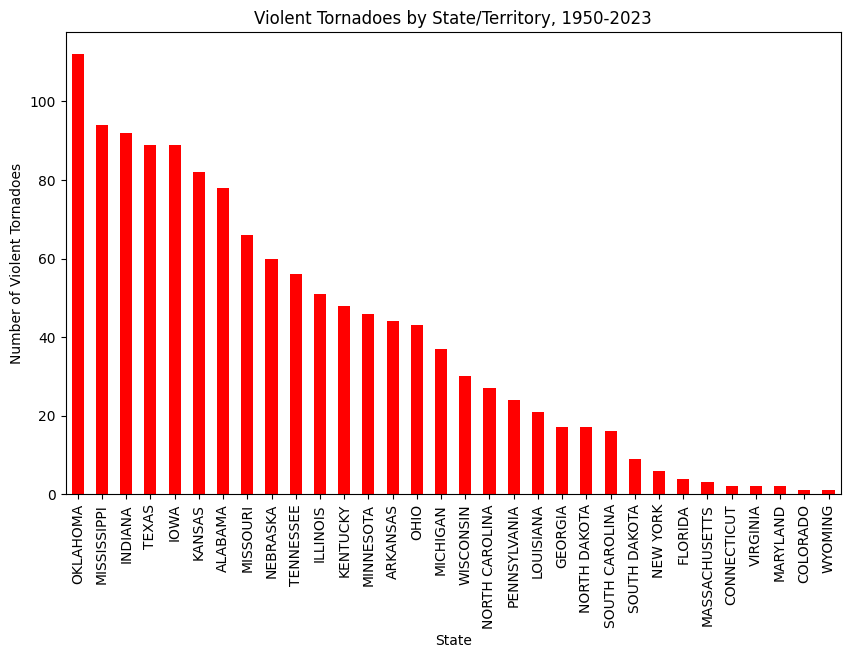

In [14]:
plt.figure(figsize=(10, 6))
violent_tornadoes['STATE'].value_counts().plot(kind='bar', color='red')
plt.title("Violent Tornadoes by State/Territory, 1950-2023")
plt.xlabel("State")
plt.ylabel("Number of Violent Tornadoes")
plt.show()

# **Exploring Storm Reports through States, Months, and Total Injuries**
We used `Vega-Lite` to explore storm reports through states, months, and total injuries.



In [15]:
display(HTML("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Storm Reports</title>
    <script src="https://cdn.jsdelivr.net/npm/vega@5.25.0/build/vega.min.js" integrity="sha256-na2uPt+tUPV7GRVpc+/ezQj+lGwljIvOJifkmg8f3as=" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@5.15.0/build/vega-lite.min.js" integrity="sha256-WLAn82Ut4GptY/IJf4K/1i+R8ibAkVLFhBVkOovqCK8=" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@6.22.2/build/vega-embed.min.js" integrity="sha256-GfFZ6w7V/y3Ws9eHVsOXZ/F1ZFroThVZraOAx3HAt6s=" crossorigin="anonymous"></script>
</head>
<body>
    <div id="viz"></div>
    <script>
        var vlSpec = {
            "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
            "data": {
            "name": "storm",
            "url": "https://raw.githubusercontent.com/Meng6/dataviz-group-project/main/StormEvents_details-ftp_v1.0_d2023_c20231017.csv"
            },
            "transform": [
            {
                "aggregate": [{"op": "count", "field": "EVENT_ID", "as": "count"}],
                "groupby": ["STATE_FIPS", "STATE", "BEGIN_YEARMONTH"]
            }
            ],
            "hconcat": [
            {
                "vconcat": [
                {
                    "width": 500,
                    "height": 300,
                    "title": "Number of Storm Reports in Each State",
                    "transform": [
                    {
                        "filter": "selected_yearmonth.BEGIN_YEARMONTH != null?datum.BEGIN_YEARMONTH == selected_yearmonth.BEGIN_YEARMONTH:isValid(datum.BEGIN_YEARMONTH)"
                    },
                    {
                        "aggregate": [{"op": "sum", "field": "count", "as": "count"}],
                        "groupby": ["STATE_FIPS", "STATE"]
                    },
                    {
                        "lookup": "STATE_FIPS",
                        "from": {
                        "data": {
                            "name": "map",
                            "url": "https://raw.githubusercontent.com/vega/vega/main/docs/data/us-10m.json",
                            "format": {"type": "topojson", "feature": "states"}
                        },
                        "key": "id"
                        },
                        "as": "geo"
                    }
                    ],
                    "params": [
                    {
                        "name": "selected_state",
                        "select": {"type": "point", "fields": ["STATE"]}
                    }
                    ],
                    "projection": {"type": "albersUsa"},
                    "mark": "geoshape",
                    "encoding": {
                    "shape": {"field": "geo", "type": "geojson"},
                    "color": {
                        "field": "count",
                        "type": "quantitative",
                        "legend": {"orient": "left"}
                    },
                    "tooltip": [{"field": "STATE"}, {"field": "count"}]
                    }
                },
                {
                    "width": 500,
                    "height": 200,
                    "mark": {"type": "bar", "cornerRadius": 5},
                    "params": [
                    {
                        "name": "selected_yearmonth",
                        "select": {"type": "point", "fields": ["BEGIN_YEARMONTH"]}
                    }
                    ],
                    "encoding": {
                    "x": {"field": "BEGIN_YEARMONTH", "type": "ordinal"},
                    "y": {
                        "field": "count",
                        "type": "quantitative",
                        "aggregate": "sum",
                        "title": "COUNT"
                    },
                    "fillOpacity": {
                        "condition": {"param": "selected_yearmonth", "value": 1},
                        "value": 0.3
                    }
                    }
                }
                ]
            },
            {
                "width": 500,
                "height": 500,
                "data": {
                "name": "storm2",
                "url": "https://raw.githubusercontent.com/Meng6/dataviz-group-project/main/StormEvents_details-ftp_v1.0_d2023_c20231017.csv"
                },
                "transform": [
                {
                    "filter": "selected_yearmonth.BEGIN_YEARMONTH != null?(selected_state.STATE != null?datum.BEGIN_YEARMONTH == selected_yearmonth.BEGIN_YEARMONTH && datum.STATE == selected_state.STATE:datum.BEGIN_YEARMONTH == selected_yearmonth.BEGIN_YEARMONTH):isValid(datum.BEGIN_YEARMONTH)"
                },
                {
                    "sort": [{"field": "BEGIN_DATE_TIME"}],
                    "window": [
                    {
                        "op": "sum",
                        "field": "INJURIES_DIRECT",
                        "as": "TOTAL_INJURIES_DIRECT"
                    },
                    {
                        "op": "sum",
                        "field": "INJURIES_INDIRECT",
                        "as": "TOTAL_INJURIES_INDIRECT"
                    },
                    {
                        "op": "sum",
                        "field": "DEATH_DIRECT",
                        "as": "TOTAL_DEATH_DIRECT"
                    },
                    {
                        "op": "sum",
                        "field": "DEATH_INDIRECT",
                        "as": "TOTAL_DEATH_INDIRECT"
                    }

                    ],
                    "frame": [null, 0]
                }
                ],
                "encoding": {"x": {"field": "BEGIN_DATE_TIME", "type": "temporal"}},
                "layer": [
                {
                    "mark": {"type": "line"},
                    "encoding": {
                    "y": {
                        "field": "TOTAL_INJURIES_DIRECT",
                        "type": "quantitative",
                        "axis": {"tickMinStep": 1},
                        "title": null
                    },
                    "color": {"datum": "TOTAL_INJURIES_DIRECT"},
                    "tooltip": [
                        {"field": "BEGIN_DATE_TIME", "type": "temporal", "timeUnit": "yearmonthdatehoursminutes"},
                        {"field": "TOTAL_INJURIES_DIRECT", "type": "quantitative"},
                        {"field": "INJURIES_DIRECT", "type": "quantitative"},
                        {"field": "INJURIES_INDIRECT", "type": "quantitative"},
                        {"field": "DEATH_DIRECT", "type": "quantitative"},
                        {"field": "DEATH_INDIRECT", "type": "quantitative"},
                        {"field": "MAGNITUDE_TYPE", "type": "nominal"},
                        {"field": "MAGNITUDE", "type": "ordinal"},
                        {"field": "EVENT_NARRATIVE", "type": "nominal"}
                    ]
                    }
                },
                {
                    "mark": {"type": "line"},
                    "encoding": {
                    "y": {
                        "field": "TOTAL_INJURIES_INDIRECT",
                        "type": "quantitative",
                        "axis": {"tickMinStep": 1},
                        "title": null
                    },
                    "color": {"datum": "TOTAL_INJURIES_INDIRECT"},
                    "tooltip": [
                        {"field": "BEGIN_DATE_TIME", "type": "temporal", "timeUnit": "yearmonthdatehoursminutes"},
                        {"field": "TOTAL_INJURIES_INDIRECT", "type": "quantitative"},
                        {"field": "INJURIES_DIRECT", "type": "quantitative"},
                        {"field": "INJURIES_INDIRECT", "type": "quantitative"},
                        {"field": "DEATH_DIRECT", "type": "quantitative"},
                        {"field": "DEATH_INDIRECT", "type": "quantitative"},
                        {"field": "MAGNITUDE_TYPE", "type": "nominal"},
                        {"field": "MAGNITUDE", "type": "ordinal"},
                        {"field": "EVENT_NARRATIVE", "type": "nominal"}
                    ]
                    }
                }
                ]
            }
            ]
        };
        vegaEmbed("#viz", vlSpec);
    </script>
</body>
</html>
"""))

# **Insights into Weather Events: Analyzing Temporal Patterns and Impact analysis**

To analyze the following questions altair and matplotlib is used.
1. Temporal Patterns in Event Reporting by Top Sources
2. Understanding the Impact: Total Property Damage by Magnitude Range
3. Analysis of Fatalities and Injuries Across Various Weather Events
4. Differences of direct and indirect casualites for five dangerous events
5. Monthly Distribution of Tornado Events across years


***Temporal Patterns in Event Reporting by Top Sources***

In [16]:
month_order = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# Extract unique years from the dataset, considering only years greater than 2000
years_list = sorted(StormEvents_df[StormEvents_df['YEAR'] > 2000]['YEAR'].unique())

# Create a Dropdown widget for selecting the year
year_dropdown = widgets.Dropdown(
    options=years_list,
    value=2023,
    description='Select Year:',
    style={'width': '50%'}
)

# Function to update the chart based on the selected year
def update_chart(selected_year):
    # Filter data for the selected year and where 'SOURCE' is not null or NA
    filtered_data = StormEvents_df[(StormEvents_df['YEAR'] == selected_year) & (StormEvents_df['SOURCE'].notna())]

    # Group the data by 'SOURCE' and calculate the count
    source_event_count = (
        filtered_data.groupby(['SOURCE'])
        .size()
        .nlargest(10)
        .reset_index(name='COUNT')
    )

    # Extract the top sources
    top_sources = source_event_count['SOURCE']

    # Calculate totals per month for the top sources
    totals_per_month = (
        filtered_data[filtered_data['SOURCE'].isin(top_sources)]
        .groupby(['SOURCE', 'MONTH_NAME'])
        .size()
        .reset_index(name='COUNT')
    )

    # Create an Altair chart
    chart = (
        alt.Chart(totals_per_month)
        .mark_area()
        .encode(
            x=alt.X('MONTH_NAME:O', title='Month', sort=month_order),
            y=alt.Y('COUNT:Q', title='Event Count'),
            color='SOURCE:N',
            tooltip=['SOURCE:N', 'COUNT:Q']
        )
        .properties(width=800, height=400, title=f'Monthly Distribution of Total Events Reported by Top Sources in {selected_year}')
    )

    # Display the chart
    display(chart)

widgets.interactive(update_chart, selected_year=year_dropdown)


interactive(children=(Dropdown(description='Select Year:', index=22, options=(2001, 2002, 2003, 2004, 2005, 20…

***Understanding the Impact: Total Property Damage by Magnitude Range***

In [17]:
# Extract relevant columns and drop missing values
df = StormEvents_df[['MAGNITUDE', 'DAMAGE_PROPERTY']].dropna()

# Convert DAMAGE_PROPERTY to numeric, considering 'K' as 1000, 'M' as millions, 'B' as billions
def convert_damage(value):
    multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9}
    value = str(value).upper()
    for suffix, multiplier in multipliers.items():
        if value.endswith(suffix):
            try:
                return float(value[:-1]) * multiplier
            except ValueError:
                return pd.NA
    return pd.NA

# Apply the conversion function to create a new column
df['DAMAGE_PROPERTY_inM'] = df['DAMAGE_PROPERTY'].apply(convert_damage)

# Create bins for magnitude and calculate total damage by magnitude bins
magnitude_bins = [0, 20, 40, 60, 80, 100, 120]
df['MAGNITUDE_BIN'] = pd.cut(df['MAGNITUDE'], bins=magnitude_bins, right=False)
total_damage_by_magnitude = df.groupby('MAGNITUDE_BIN')['DAMAGE_PROPERTY_inM'].sum().reset_index()

# Convert the interval index to a string for Altair compatibility
total_damage_by_magnitude['MAGNITUDE_BIN'] = total_damage_by_magnitude['MAGNITUDE_BIN'].astype(str)

# Plotting using Altair
chart = (
    alt.Chart(total_damage_by_magnitude)
    .mark_bar()
    .encode(
        x=alt.X('MAGNITUDE_BIN:O', title='Magnitude Range'),
        y=alt.Y('DAMAGE_PROPERTY_inM:Q', title='Total Damage'),
        tooltip=['MAGNITUDE_BIN:O', 'DAMAGE_PROPERTY_inM:Q']
    )
    .properties(width=600, height=400, title='Total Damage by Magnitude Range')
)
display(chart)


alt.Chart(...)

***Analysis of Fatalities and Injuries Across Various Weather Events***

In [18]:
newdf=  StormEvents_df[['EVENT_TYPE','DEATHS_DIRECT','DEATHS_INDIRECT','INJURIES_DIRECT','INJURIES_INDIRECT']].copy()
newdf['total']=newdf['DEATHS_DIRECT']+newdf['DEATHS_INDIRECT']+newdf['INJURIES_DIRECT']+newdf['INJURIES_INDIRECT']
g= newdf.groupby('EVENT_TYPE').agg('sum').reset_index()
six=g.nlargest(6,'total', keep='all')

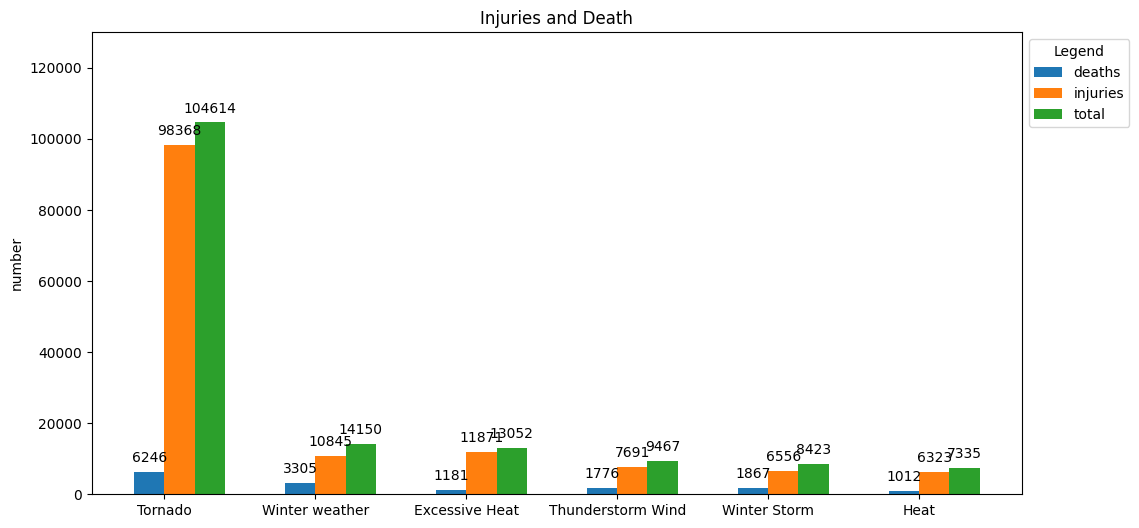

In [19]:
import matplotlib.pyplot as plt
import numpy as np

event_type = ('Tornado', 'Winter weather', 'Excessive Heat', 'Thunderstorm Wind', 'Winter Storm', 'Heat')
numbers = {
    'deaths': (six['DEATHS_DIRECT'] + six['DEATHS_INDIRECT']),
    'injuries': (six['INJURIES_DIRECT'] + six['INJURIES_INDIRECT']),
    'total': (six['total']),
}

x = np.arange(len(event_type))  # the label locations
width = 0.2  # adjust the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))  # adjust the figure size

for attribute, measurement in numbers.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('number')
ax.set_title('Injuries and Death')
ax.set_xticks(x + width / 2)  # adjust the x-axis ticks position
ax.set_xticklabels(event_type)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Legend', ncol=1)
ax.set_ylim(0, 130000)

plt.show()


***Differences of direct and indirect casualites for five dangerous events***

In [21]:
import numpy as np
import bqplot.pyplot as plt
from bqplot import Lines, Figure, OrdinalScale, LinearScale, Axis
import ipywidgets as widgets
from IPython.display import display


x_values = ['Tornado ', 'Excessive Heat', 'Winter Weather', 'Thunderstorm Wind', 'Winter Storm','Heat']
y_values_1a = six['INJURIES_DIRECT']
y_values_1b = six['INJURIES_INDIRECT']
y_values_2a = six['DEATHS_DIRECT']
y_values_2b = six['DEATHS_INDIRECT']



x_scale = OrdinalScale()
y_scale = LinearScale()


line1a = Lines(x=x_values, y=y_values_1a, scales={'x': x_scale, 'y': y_scale}, colors=['orange'], line_style='solid', labels=['Variable 1a'])
line1b = Lines(x=x_values, y=y_values_1b, scales={'x': x_scale, 'y': y_scale}, colors=['brown'], line_style='dashed', labels=['Variable 1b'])


line2a = Lines(x=x_values, y=y_values_2a, scales={'x': x_scale, 'y': y_scale}, colors=['blue'], line_style='solid', labels=['Variable 2a'])
line2b = Lines(x=x_values, y=y_values_2b, scales={'x': x_scale, 'y': y_scale}, colors=['green'], line_style='dashed', labels=['Variable 2b'])


x_axis = Axis(scale=x_scale, label='Event Types')
y_axis = Axis(scale=y_scale, orientation='vertical', label='Number of Casualites')

# Create text box for line labels
label_box = widgets.Textarea(
    value='',
    description='Line Labels:',
    disabled=True,
    layout=widgets.Layout(width='200px', height='90px')
)

# Create dropdown widget with updated variable names
variable_dropdown = widgets.Dropdown(
    options=['Injuries', 'Deaths'],
    value='Injuries',
    description='Select:'
)

# Function to update the plot and labels based on the selected variable
def update_plot(change):
    selected_variable = variable_dropdown.value
    if selected_variable == 'Injuries':
        line1a.visible = True
        line1b.visible = True
        line2a.visible = False
        line2b.visible = False
        label_box.value = 'Direct Injuries:___\nIndirect Injuries:---'
    elif selected_variable == 'Deaths':
        line1a.visible = False
        line1b.visible = False
        line2a.visible = True
        line2b.visible = True
        label_box.value = 'Direct Deaths:___\nIndirect Deaths:---'

# Attach the function to the dropdown's change event
variable_dropdown.observe(update_plot, names='value')

# Create figure
fig = Figure(marks=[line1a, line1b, line2a, line2b], axes=[x_axis, y_axis], title='Differences of Direct and Indirect Causalties')
fig.layout.width = '1000px'
fig.layout.height = '800px'

# Display the dropdown, the plot, and the label box
display(widgets.HBox([variable_dropdown, fig, label_box]))

***Monthly Distribution of Tornado Events across years***

In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import matplotlib.pyplot as plt


years_list = sorted(StormEvents_df['YEAR'].unique())

year_dropdown = widgets.Dropdown(
    options=[(str(year), year) for year in years_list],
    value=2023,
    description='Select Year:',
    style={'width': '50%'}
)


def update_chart(selected_year):

    filtered_data = StormEvents_df[(StormEvents_df['YEAR'] == selected_year) & (StormEvents_df['EVENT_TYPE'] == 'Tornado')]


    tornado_count_per_month = filtered_data.groupby('MONTH_NAME').size().reset_index(name='COUNT')


    fig = go.Figure()
    fig.add_trace(go.Bar(x=tornado_count_per_month['MONTH_NAME'], y=tornado_count_per_month['COUNT']))

    fig.update_layout(title=f'Monthly Tornado Events in {selected_year}',
                      xaxis_title='Month',
                      yaxis_title='Tornado Count',
                      showlegend=False)


    plt.figure(figsize=(10, 6))
    plt.bar(tornado_count_per_month['MONTH_NAME'], tornado_count_per_month['COUNT'])
    plt.title(f'Monthly Distribution of Tornado Events in {selected_year}')
    plt.xlabel('Month')
    plt.ylabel('Tornado Count')
    plt.show()


widgets.interactive(update_chart, selected_year=year_dropdown)


interactive(children=(Dropdown(description='Select Year:', index=73, options=(('1950', 1950), ('1951', 1951), …